# Unit 2 - Open Loop Identification - Measurement of Frequency Response Functions

# Objective

Obtain an estimate of the Frequency Response Function (FRF) of a system. 
This is a Non-parametric identification approach (aka frequency domain system identification).

The material in this notebook is from Chapter 2 in the book "System Identification: A Frequency Domain Approach". This book is available via the U of C library as an online book. 

# Activity

Before continuing to the rest of this notebook, read Section 2.1 and 2.2 in "System Identification: A Frequency Domain Approach" by Rik Pintelon.

Make sure you understand the properties about the DFT discussed in that section. 

# Frequency Domain Identification

The following material is based on Section 2.4 in "System Identification: A Frequency Domain Approach". Skim the material in that section before continuing to read this notebook. 

# Open Loop Measurement Setup

![OpenLoop](open-loop-EIV.png "Open Loop")

# First Attempt

This attempt is based on the equation:
$$
Y(k) = G(k)U(k)
$$
which holds at each frequency $f_k=kf_s/N$, $k=0,1,2,\ldots$. 

Approach:
1. Excite system with a sinusoid of frequency $f_k$: $r(t) = \sin(2\pi f_k t)$
2. Measure input $u$ and output $y$. Record $N$ samples at sampling frequency $f_s$.
3. Take DFT of $u$ and $y$.
4. Estimate $G$ at frequency $f_k$ as $G(k) = Y(k)/U(k)$

# Analysis of First Attempt

Watch the video here. The video will cover the following material. After viewing the video, return here.

Can express measured input and output as 
$$
\begin{align*}
\tilde{u}(t) &= u(t) + s_u(t) \\
\tilde{y}(t) &= y(t) + v_y(t) + s_y(t)
\end{align*}
$$
Take DFT of both sides:
$$
\begin{align*}
\tilde{U}(k) &= U(k) + S_u(k) \\
&= U(k) + N_u(k) \\
\tilde{Y}(k) &= Y(k) + V_y(k) + S_y(k) \\
&= Y(k) + N_y(k) 
\end{align*}
$$
where in the second lines, all the noise terms are lumped into one term $N_u$ and $N_y$. This notation matches the textbook reading. 

We want to know how good the estimate of $G$ is.

Using the above notation, we can express the estimate of $G$ at frequency $f_k$ as:
$$
\begin{align*}
\hat{G}(k) &= \frac{\tilde{Y}(k)}{\tilde{U}(k)} \\
&= \frac{Y(k)+N_y(k)}{U(k)+N_u(k)} 
\end{align*}
$$
We can express $Y(k) = G(k)U(k)$. This substitution results in:
$$
\begin{align*}
\hat{G}(k) &= \frac{G(k)U(k)+N_y(k)}{U(k)+N_u(k)} 
\end{align*}
$$
Pull out the factor $G(k)$:
$$
\begin{align*}
\hat{G}(k) &= \frac{G(k)\Big(U(k)+\frac{N_y(k)}{G(k)}\Big)}{U(k)+N_u(k)} 
\end{align*}
$$
Divide top and bottom by $1/U(k)$:
$$
\begin{align*}
\hat{G}(k) &= \frac{G(k)\Big(1+\frac{N_y(k)}{G(k)U(k)}\Big)}{1+\frac{N_u(k)}{U(k)}} 
\end{align*}
$$
And now again make the substitution that $Y(k) = G(k)U(k)$:
$$
\begin{align*}
\hat{G}(k) &= G(k) \frac{\Big(1+\frac{N_y(k)}{Y(k)}\Big)}{1+\frac{N_u(k)}{U(k)}} 
\end{align*}
$$
This expression shows that the estimated value $\hat{G(k)}$ would be equal to the true value $G(k)$ if the noise terms $N_y(k)$ and $N_u(k)$ were $0$. 

What about the expected value of $\hat{G}(k)$? In other words, if we did many experiments with a sinusoid of frequency $f_k$, and made many estimates $\hat{G}(k)$, would the average of these estimates be equal to the true value $G(k)$?

# Power Series

Before we continue, introduce a handy mathematical trick.

Consider the power series: 
$$
\sum_{k=0}^{\infty} a^k = 1 + a + a^2 + a^3 + \cdots
$$
It can be shown that if $a<1$, then this sum is equal to:
$$
\sum_{k=0}^{\infty} a^k = \frac{1}{1-a}.
$$
It is important to note that this sum only converges for $a<1$.

Now we can make approximations of $\frac{1}{1-a}$. We can make a first order approximation:
$$
\frac{1}{1-r} \approx 1 + a.
$$
Or a second order approximation:
$$
\frac{1}{1-r} \approx 1 + a + a^2.
$$
Or a third order approximation:
$$
\frac{1}{1-r} \approx 1 + a + a^2 + a^3.
$$
Clearly, the higher the order of the approximation, the better it will be. 

# Expected value of $\hat{G}(k)$

Approximate the denominator of $\hat{G}(k)$ as a second order approximation (note that this approximation only holds if $\frac{N_u(k)}{U(k)}<1$):
$$
\hat{G}(k) \approx G(k) \Big(1+\frac{N_y(k)}{Y(k)}\Big) \Big ( 1+\frac{N_u(k)}{U(k)} + \Big(\frac{N_u(k)}{U(k)}\Big)^2 \Big )
$$
Calculate expected value of both sides:
$$
\mathbb{E}[\hat{G}(k)] \approx \mathbb{E}\Big[ G(k) \Big(1+\frac{N_y(k)}{Y(k)}\Big) \Big ( 1+\frac{N_u(k)}{U(k)} + \Big(\frac{N_u(k)}{U(k)}\Big)^2 \Big )\Big]
$$
Expand the product:
$$
\mathbb{E}[\hat{G}(k)] \approx \mathbb{E}\Big[ G(k) \Big( 1+\frac{N_u(k)}{U(k)} + \Big(\frac{N_u(k)}{U(k)}\Big)^2 + \frac{N_y(k)}{Y(k)} + \frac{N_y(k)}{Y(k)}\frac{N_u(k)}{U(k)} + \frac{N_y(k)}{Y(k)}\Big(\frac{N_u(k)}{U(k)}\Big)^2 \Big )\Big]
$$


# Simplifying the expression for $\hat{G}(k)$

The following properties of the noise will help in simplifying the expression for $\hat{G}(k)$:
- $\mathbb{E}[N_u(k)] = 0$ (the noise on the input has zero mean)
- $\mathbb{E}[N_y(k)] = 0$ (the noise on the output has zero mean)
- $\mathbb{E}[N_u^2(k)] = 0$
- $\mathbb{E}[N_u(k)N_y(k)] = 0$ (the input and output noises are uncorrelated)

Using these simplifying expressions we get:
$$
\mathbb{E}[\hat{G}(k)] \approx G(k)
$$

This is great news! It means that this method of estimating $G(k)$ will be unbiased (i.e. if we collected many data sets and averaged all our estimates together, we would eventually obtain an exact estimate of the true $G(k)$).

However! Not so fast!

We assumed that $\frac{N_u(k)}{U(k)}<1$. In otherwords, we assumed that the input noise at frequency $f_k$ is small compared to the input at frequency $f_k$. If the input noise is large, then we will obtain a biased estimate! This means that even if we collect many data sets, the average value of those estimates will not tend toward $G(k)$. 

Interestingly, note that we did not have to make any assumptions about $N_y(k)$ being small relative to $Y(k)$. 

This is a fairly common pattern in system identification: sensor noise on the input will result in biased estimates, whereas sensor noise on the output does not.

An intuitive reasoning is: when there is sensor noise on the input, we do not actually know the signal that excited the system $G$ (we don't know what $u$ is). We only know a corrupted version of the input (i.e. the measurement of $u$, denoted as $\tilde{u}$).

Use the code below to make various estimates of an unknown transfer function $G$.

Make sure that you understand the code, it is a direct implementation of the theory.

To explore the various concepts:
1. set num_trials to 1
2. change the values of M_u and M_y to vary the magnitude of the noise.
    - Try make M_u very large (such as 10) and M_y very small (such as 0)
    - Try make M_y very large (such as 10) and M_u very small (such as 0)
3. For each of the above cases, increase the number num_trials (to say 200) and observe the averaged estimate

For each case that you try, do the results match what the theory says should happen?

Can you observe a bias in the estimates?

Do you notice a variance in the estimates?

trial 0
trial 1
trial 2
trial 3
trial 4
trial 5
trial 6
trial 7
trial 8
trial 9
(50,)


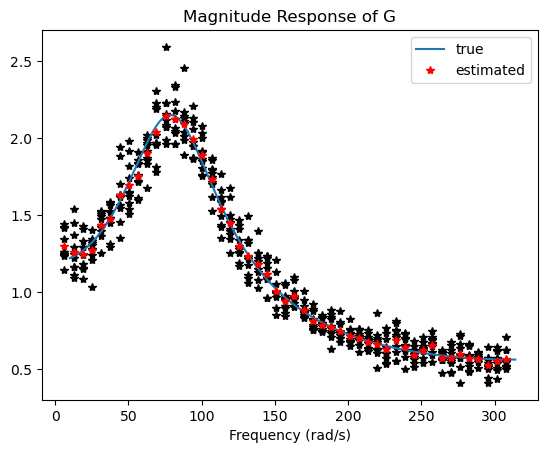

In [8]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

N = 1001
t = np.linspace(0,10,N)
t = t[0:-1]
N = 1000
Ts = t[1]-t[0]
G = ct.tf([1, -0.4], [1, -1, 0.5], Ts)

fs = 1/Ts

b, a = sp.signal.butter(6, 0.5, 'low')


nf = 50
num_trials = 10
M_u = 1.5
M_y = 1.5
G_hat = np.empty((nf,num_trials),dtype=complex)
for trial in range(num_trials):
    print('trial', trial)
    for f in range(1,nf):

        # setup data generating system
        r = np.sin(2*np.pi*f*t)
        nu = sp.signal.lfilter(b, a, M_u*np.random.randn(N))
        u = r + nu
        tt,y = ct.forced_response(G,U=r) + M_y*np.random.randn(N)
        
        # the (frequency domain) identification algorithm
        Y = np.fft.fft(y)
        U = np.fft.fft(u)
        G_hat[f-1,trial] = Y[int(N/fs*f)]/U[int(N/fs*f)]
    

G_hat_mean = np.mean(G_hat,axis=1)
print(G_hat_mean.shape)
mag,phase,w1 = ct.bode_plot(G,plot=False)

w2 = np.linspace(1,nf)*2*np.pi
fig,ax = plt.subplots(1)
ax.plot(w2[0:nf-1],abs(G_hat[0:nf-1,:]),'k*',label='_estimated')
ax.plot(w1,mag,label='true')
ax.plot(w2[0:nf-1],abs(G_hat_mean[0:nf-1]),'r*',label='estimated')
ax.set_title('Magnitude Response of G')
ax.set_xlabel('Frequency (rad/s)')
ax.legend()





# Text Book Reading

The following material is from Section 2.5 in "System Identification: A Frequency Domain Approach".

# The advantage of averaging

From the above theory and experiment, we have learned that if there is sensor noise on the input, even averaging will not help us eliminate all errors (there will still be a bias error).

However, instead of averaging the estimates $\hat{G}(k)$ consider what happens if we average the data to obtain an estimate of $Y(k)$ and $U(k)$ and construct an estimate of $G(k)$ using these estimates.

Suppose that we have collected $L$ data sets. Denote the measured input $\tilde{u}(t)$ of the $\ell$th data set as $\tilde{u}^{\ell}(t)$. Similarly, let $\tilde{y}^{\ell}(t)$ denote the measured output of the $\ell$th data set.

The references $r^{\ell}(t)$ that generate the data identical for $\ell = 0,1, \ldots, L$. For instance, when attempting to obtain an estimate of $G$ at frequency $f_k$, the reference consists of a sinusoid of frequency $f_k$, with zero phase ($r(t)=\sin(2*\pi*f_kt)$). Note that the superscipt $\ell$ does not denote an exponent in this case!

Now consider averaging the input at frequency $f_k$ to obtain an estimate of $U(k)$. Denote this estimate as $\hat{U}(k)$:
$$
\hat{U}(k) = \frac{1}{L}\sum_{\ell = 0}^{L-1} \tilde{U}^{\ell}(k)
$$
Similarly,
$$
\hat{Y}(k) = \frac{1}{L}\sum_{\ell = 0}^{L-1} \tilde{Y}^{\ell}(k)
$$

The estimate of $G$ at frequency $f_k$ is then:
$$
\hat{G}(k) = \frac{\hat{Y}(k)}{\hat{U}(k)}
$$

# Analyise the Estimate!

What is the expected value of this estimate of $G$? Note the following expected values:
$$
\begin{align*}
\mathbb{E}[\hat{U}(k)] &= \mathbb{E}\Big[\frac{1}{L}\sum_{\ell = 0}^{L-1} \tilde{U}^{\ell}(k)\Big ]\\
&= \mathbb{E}\Big[\frac{1}{L}\sum_{\ell = 0}^{L-1} U^{\ell}(k) + N_u^{\ell}(k)\Big] \\
&= U(k)
\end{align*}
$$
Similarly,
$$
\mathbb{E}[\hat{Y}(k)] = Y(k).
$$
In otherwords, if we take a very large number of data sets and average the inputs together, we will obtain an estimate of the noise free input (and similarly for the output).

This means that for a large number of data sets, our estimate $\hat{G}(k) = G(k)$!

This result hold irrespective of the input noise being large or not! So apparantly, where we take the average can have a big effect on the properties of the estimated $\hat{G}(k)$. 

# Explore! 

Make sure you understand the following code. It is a direct implementation of the theory. 

Use the code to explore this result.

Try set the input noise to very high values such as 20. What do you observe? Does the result match the theory? 

Which estimate has less bias?
Which estimate has less variance?


trial 0


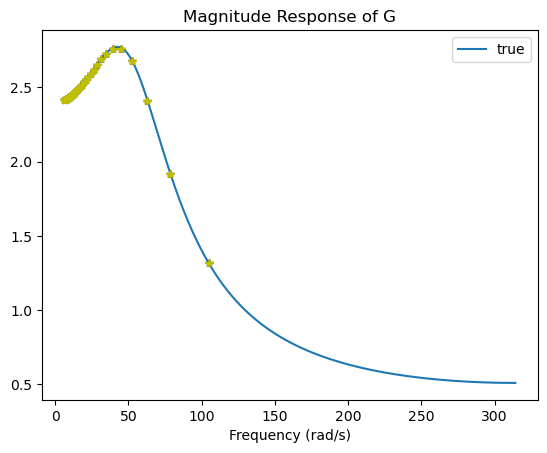

In [85]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

tN = 10 #time in seconds for simulation
N = 1001
t = np.linspace(0,tN,N)
t = t[0:-1]
N -= 1
Ts = t[1]-t[0]
G = ct.tf([1, -0.4], [1, -1.25, 0.5], Ts)

fs = 1/Ts

b, a = sp.signal.butter(6, 0.5, 'low')


P0=100
Pf=4
Pstep = 2
nf=int(np.floor((T0-Tf)/Tstep))
num_trials = 1
M_u = 0
M_y = 0
G_hat1 = np.empty((nf,num_trials),dtype=complex)
G_hat2 = np.empty((nf,num_trials),dtype=complex)
f_vec = np.zeros(nf)
for trial in range(num_trials):
    print('trial', trial)
    iter_f = 0
    for P in range(P0,Pf,-Pstep):
        
        # setup data generating system
        r = np.sin(2*np.pi/Ts/P*t)
        nu = sp.signal.lfilter(b, a, M_u*np.random.randn(N))
        u = r + nu
        tt,y = ct.forced_response(G,U=r) + M_y*np.random.randn(N)

        num_periods = int( np.floor(N/P) )
        # First algorithm
        Y = np.fft.fft(y[0:num_periods*P])/(num_periods*P/2)
        U = np.fft.fft(u[0:num_periods*P])/(num_periods*P/2)
        G_hat1[iter_f,trial] = Y[num_periods]/U[num_periods]
        #print(np.abs(Y[num_periods]))
        #print(np.abs(U[num_periods]))
        #print(G_hat1[iter_f,trial])
        f_vec[iter_f] = 1/Ts/P
        

        # Second algorithm (estimate noise free input and output first, then estimate G using (estimates of) noise free input and output)

        y_hat = np.zeros(P,dtype=float)
        u_hat = np.zeros(P,dtype=float)
        #print('num_periods:', num_periods, 'samples per period:', T)
        for ell in range(num_periods): 
            y_hat += y[ell*P:(ell+1)*P]
            u_hat += u[ell*P:(ell+1)*P]
        
        Y_hat = np.fft.fft(y_hat)
        U_hat = np.fft.fft(u_hat)
        G_hat2[iter_f,trial] = Y_hat[1]/U_hat[1] 
        iter_f += 1
    

G_hat1_mean = np.mean(G_hat1,axis=1)
G_hat2_mean = np.mean(G_hat2,axis=1)

#print(G_hat_mean.shape)
mag,phase,w1 = ct.bode_plot(G,plot=False)

w2 = np.linspace(1,nf)*2*np.pi
fig,ax = plt.subplots(1)
ax.plot(w1,mag,label='true')
ax.plot(2*np.pi*f_vec[0:-1],abs(G_hat1[0:-1]),'k*',label='_estimated 1')
ax.plot(2*np.pi*f_vec[0:-1],abs(G_hat2[0:-1]),'y*',label='_estimated 2')
#ax.plot(w2[0:nf-1],abs(G_hat1_mean[0:nf-1]),'r*',label='estimated 1')
#ax.plot(w2[0:nf-1],abs(G_hat2_mean[0:nf-1]),'g*',label='estimated 2')
ax.set_title('Magnitude Response of G')
ax.set_xlabel('Frequency (rad/s)')
ax.legend()





trial 0


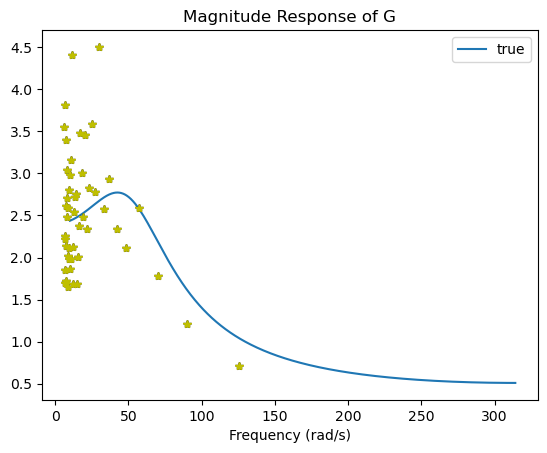

In [5]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


def frf_est1(u,y,period):
    N = u.shape[0]
    num_periods = int( np.floor(N/period) )
    Y = np.fft.fft(y[0:num_periods*P])/(num_periods*period/2)
    U = np.fft.fft(u[0:num_periods*P])/(num_periods*period/2)
    G_hat = Y[num_periods]/U[num_periods]
    return G_hat

def frf_est2(u,y,period):
    num_periods = int( np.floor(N/period) )
    y_hat = np.zeros(period,dtype=float)
    u_hat = np.zeros(period,dtype=float)

    for ell in range(num_periods): 
        y_hat += y[ell*period:(ell+1)*period]
        u_hat += u[ell*period:(ell+1)*period]
        
    Y_hat = np.fft.fft(y_hat)
    U_hat = np.fft.fft(u_hat)
    G_hat2 = Y_hat[1]/U_hat[1] 
    return G_hat2


tN = 10 #time in seconds for simulation
N = 1001
t = np.linspace(0,tN,N)
t = t[0:-1]
N -= 1
Ts = t[1]-t[0]
G = ct.tf([1, -0.4], [1, -1.25, 0.5], Ts)

fs = 1/Ts

b, a = sp.signal.butter(6, 0.5, 'low')


P0=101
Pf=3
Pstep = 2
nf=int(np.floor((P0-Pf)/Pstep))
num_trials = 1
M_u = 20
M_y = 1
G_hat1 = np.empty((nf,num_trials),dtype=complex)
G_hat2 = np.empty((nf,num_trials),dtype=complex)
f_vec = np.zeros(nf)
for trial in range(num_trials):
    print('trial', trial)
    iter_f = 0
    for P in range(P0,Pf,-Pstep):
        
        # setup data generating system
        r = np.sin(2*np.pi/Ts/P*t)
        nu = sp.signal.lfilter(b, a, M_u*np.random.randn(N))
        u = r + nu
        tt,y = ct.forced_response(G,U=r) + M_y*np.random.randn(N)

        num_periods = int( np.floor(N/P) )
        # First algorithm   
        G_hat1[iter_f,trial] = frf_est1(u,y,P)
        
        f_vec[iter_f] = 1/Ts/P
        
        # Second algorithm (estimate noise free input and output first, then estimate G using (estimates of) noise free input and output)
        G_hat2[iter_f,trial] = frf_est2(u,y,P)

        iter_f += 1
    

G_hat1_mean = np.mean(G_hat1,axis=1)
G_hat2_mean = np.mean(G_hat2,axis=1)

#print(G_hat_mean.shape)
mag,phase,w1 = ct.bode_plot(G,plot=False)

w2 = np.linspace(1,nf)*2*np.pi
fig,ax = plt.subplots(1)
ax.plot(w1,mag,label='true')
ax.plot(2*np.pi*f_vec,abs(G_hat1),'k*',label='_estimated 1')
ax.plot(2*np.pi*f_vec,abs(G_hat2),'y*',label='_estimated 2')
#ax.plot(w2[0:nf-1],abs(G_hat1_mean[0:nf-1]),'r*',label='estimated 1')
#ax.plot(w2[0:nf-1],abs(G_hat2_mean[0:nf-1]),'g*',label='estimated 2')
ax.set_title('Magnitude Response of G')
ax.set_xlabel('Frequency (rad/s)')
ax.legend()





trial 0
Ghat: (2.0682187267278844-0.6775890011624379j)
Ghat2: (2.0682187267278835-0.6775890011624379j)
Ghat: (3.139077080689867+0.2159380805668405j)
Ghat2: (3.1390770806898667+0.2159380805668406j)
Ghat: (4.379838379916262+1.2166193850729539j)
Ghat2: (4.379838379916262+1.216619385072952j)
Ghat: (-0.2783509062456795+3.3819350975664357j)
Ghat2: (-0.27835090624567993+3.3819350975664353j)
Ghat: (3.0511247124173226+1.3129850867700696j)
Ghat2: (3.051124712417322+1.3129850867700692j)
Ghat: (4.522074201405235-2.782851483352409j)
Ghat2: (4.522074201405234-2.7828514833524087j)
Ghat: (2.0889321178055416-0.3627516286512915j)
Ghat2: (2.088932117805541-0.3627516286512913j)
Ghat: (1.297960934271933-1.1725439223895069j)
Ghat2: (1.2979609342719327-1.1725439223895073j)
Ghat: (5.973626808885057+2.108922945765741j)
Ghat2: (5.973626808885055+2.108922945765742j)


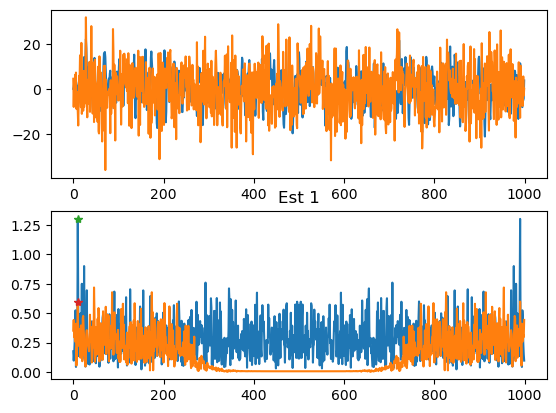

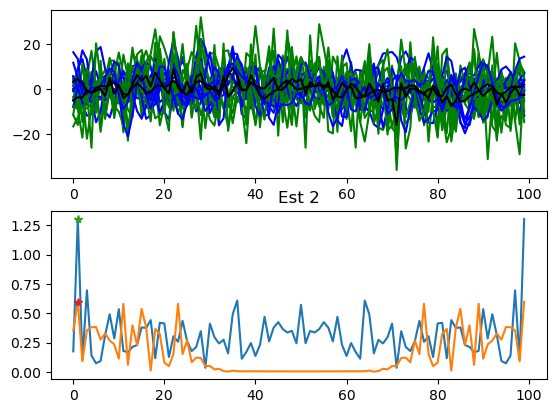

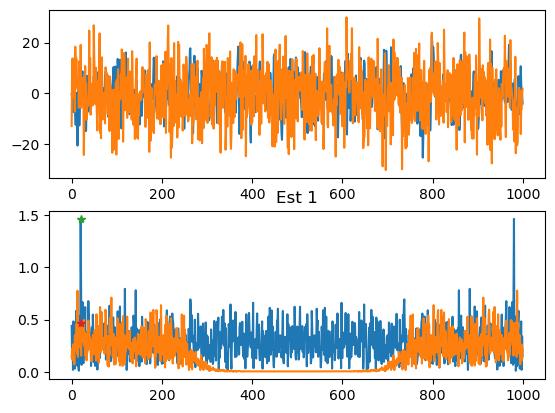

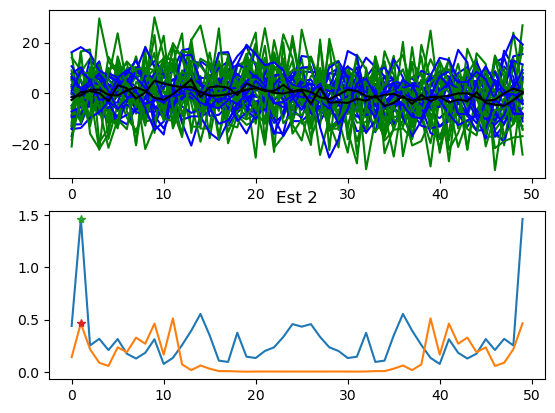

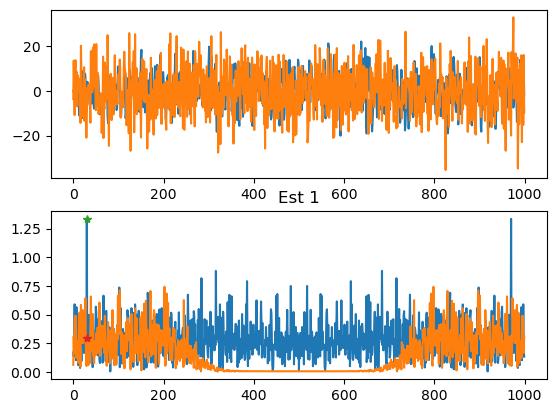

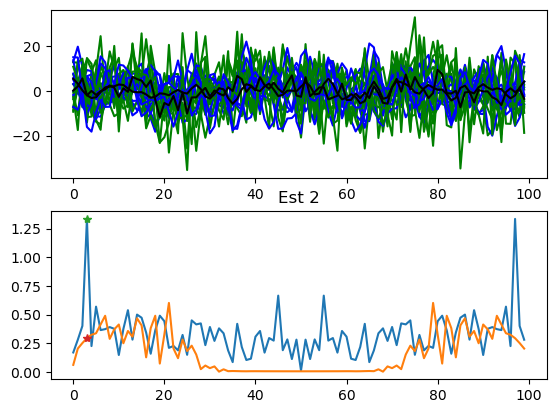

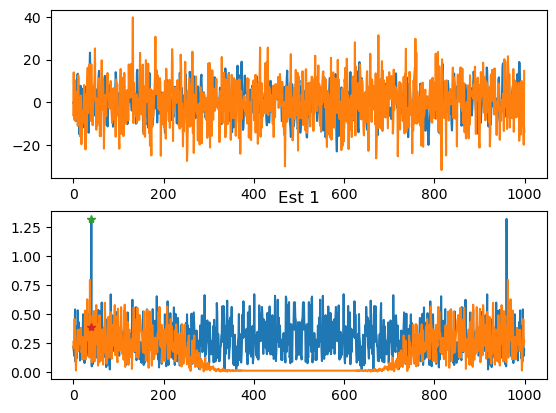

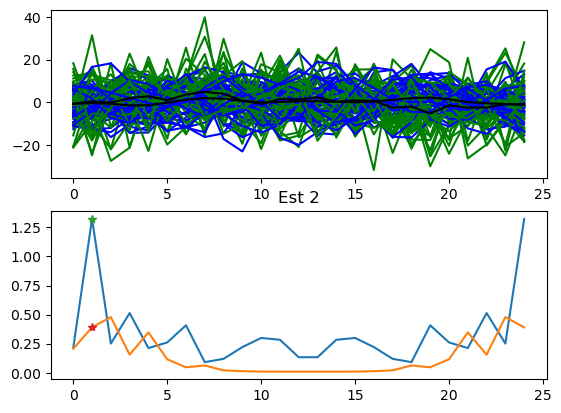

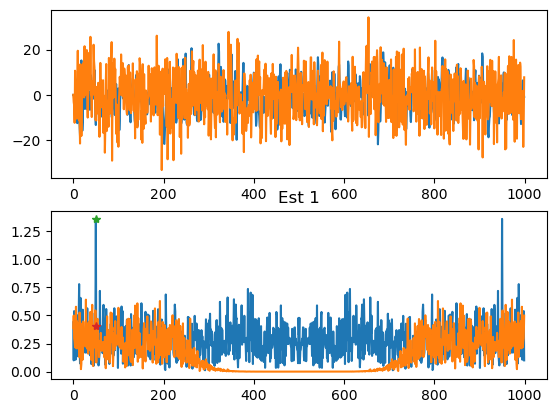

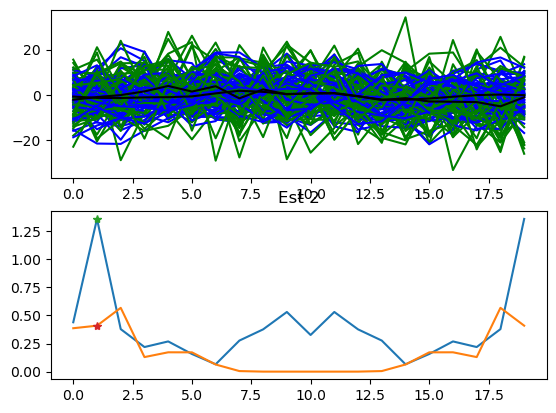

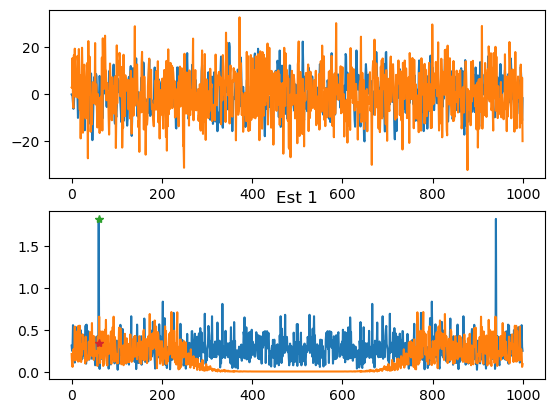

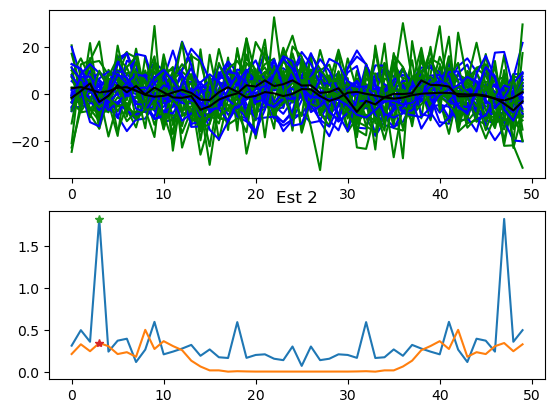

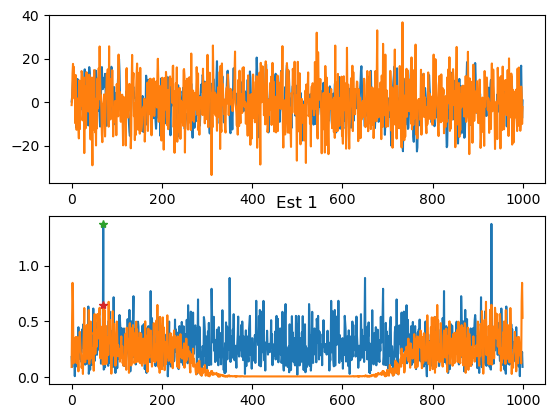

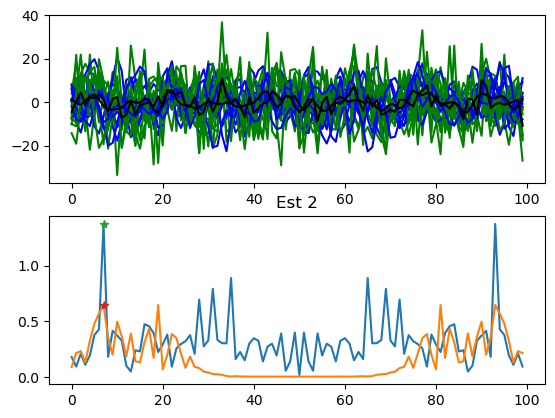

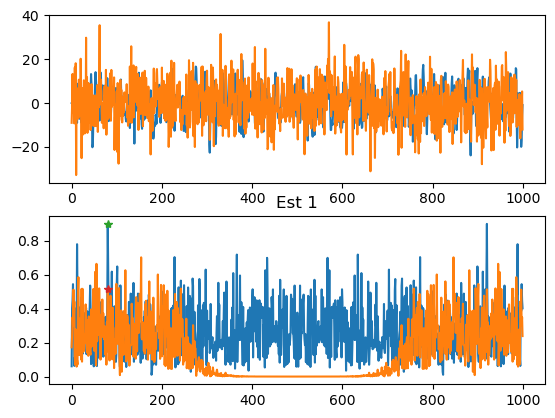

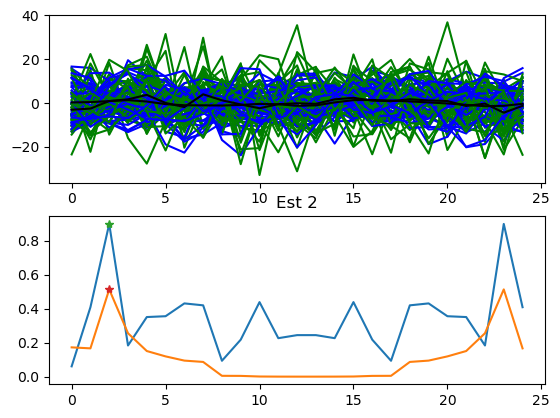

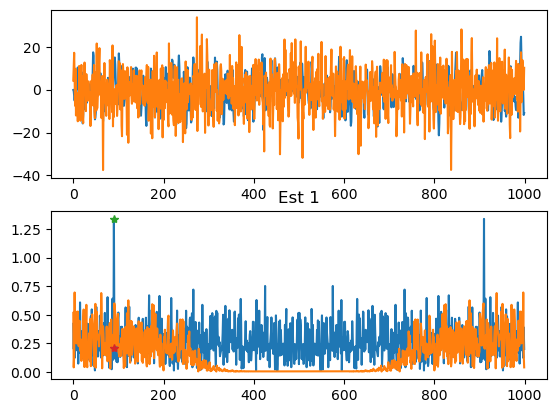

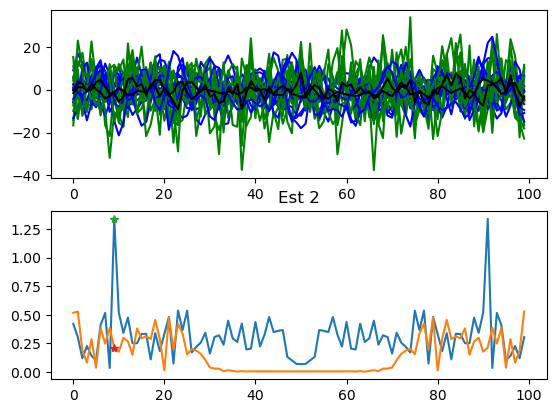

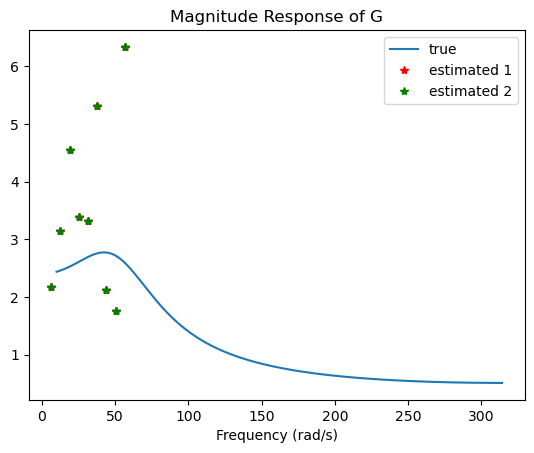

In [19]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


def frf_est1(u,y,period,f_index=-1):
    N = u.shape[0]
    num_periods = int( np.floor(N/period) )
    if f_index==-1:
        f_index=num_periods  
    Y = np.fft.fft(y[0:num_periods*P])/(num_periods*period)
    U = np.fft.fft(u[0:num_periods*P])/(num_periods*period)
    G_hat = Y[f_index]/U[f_index]
    fig,ax=plt.subplots(2,1)
    ax[0].plot(u[0:num_periods*P])
    ax[0].plot(y[0:num_periods*P])
    ax[1].plot(np.abs(Y))
    ax[1].plot(np.abs(U))
    ax[1].plot(f_index,np.abs(Y[f_index]),'*')
    ax[1].plot(f_index,np.abs(U[f_index]),'*')
    ax[1].set_title('Est 1')
    print('Ghat:', G_hat)
    return G_hat

def frf_est2(u,y,period,f_index=1):
    num_periods = int( np.floor(N/period) )
    fig,ax=plt.subplots(2,1)
    y_hat = np.zeros(period,dtype=float)
    u_hat = np.zeros(period,dtype=float)
    for ell in range(num_periods): 
        y_hat += y[ell*period:(ell+1)*period]
        u_hat += u[ell*period:(ell+1)*period]
        ax[0].plot(y[ell*period:(ell+1)*period],'g')
        ax[0].plot(u[ell*period:(ell+1)*period],'b')
        
    Y_hat = np.fft.fft(y_hat/num_periods)/period
    U_hat = np.fft.fft(u_hat/num_periods)/period
    G_hat2 = Y_hat[f_index]/U_hat[f_index] 
    
    ax[0].plot(u_hat/num_periods,'k')
    ax[0].plot(y_hat/num_periods,'k')    
    ax[1].plot(np.abs(Y_hat))
    ax[1].plot(np.abs(U_hat))
    ax[1].plot(f_index,np.abs(Y_hat[f_index]),'*')
    ax[1].plot(f_index,np.abs(U_hat[f_index]),'*')
    ax[1].set_title('Est 2')
    print('Ghat2:', G_hat2)
    return G_hat2


def frf_est3(u,y,period,f_index=1):
    num_periods = int( np.floor(N/period) )
    
    Y_hat = np.zeros(period,dtype=complex)
    U_hat = np.zeros(period,dtype=complex)
    for ell in range(num_periods): 
        Y_hat += np.fft.fft(y[ell*period:(ell+1)*period])
        U_hat += np.fft.fft(u[ell*period:(ell+1)*period])
        
    #Y_hat = np.fft.fft(y_hat)
    #U_hat = np.fft.fft(u_hat)
    G_hat2 = Y_hat[f_index]/U_hat[f_index] 
    fig,ax=plt.subplots(2,1)
    #ax[0].plot(u_hat)
    #ax[0].plot(y_hat)    
    ax[1].plot(np.abs(Y_hat))
    ax[1].plot(np.abs(U_hat))
    ax[1].plot(np.abs(Y_hat[f_index]),'*')
    ax[1].plot(np.abs(U_hat[f_index]),'*')
    ax[1].set_title('Est 2')
    print('Ghat2:', G_hat2)
    return G_hat2

tN = 10 #time in seconds for simulation
N = 1001
t = np.linspace(0,tN,N)
t = t[0:-1]
N -= 1
Ts = t[1]-t[0]
G = ct.tf([1, -0.4], [1, -1.25, 0.5], Ts)

fs = 1/Ts

b, a = sp.signal.butter(6, 0.5, 'low')


f0= 1
ff= 10
fstep = 1
nf=int(np.floor((ff-f0)/fstep))
num_trials = 1
M_u = 10
M_y = 10
G_hat1 = np.empty((nf,num_trials),dtype=complex)
G_hat2 = np.empty((nf,num_trials),dtype=complex)
f_vec = np.zeros(nf)
for trial in range(num_trials):
    print('trial', trial)
    iter_f = 0
    for f in range(f0,ff,fstep):
        
        # setup data generating system
        r = np.sin(2*np.pi*f*t)
        nu = sp.signal.lfilter(b, a, M_u*np.random.randn(N))
        u = r + nu
        tt,y = ct.forced_response(G,U=r) + M_y*np.random.randn(N)

        
        # First algorithm 
        Tsf_gcd = np.gcd(int(1/Ts),f)
        P = int((1/Ts)/Tsf_gcd)
        num_periods = int( np.floor(N/P) )
        f_index = int(f/Tsf_gcd)
        G_hat1[iter_f,trial] = frf_est1(u,y,P,f_index*num_periods)
        
        
        
        # Second algorithm (estimate noise free input and output first, then estimate G using (estimates of) noise free input and output)
        G_hat2[iter_f,trial] = frf_est2(u,y,P,f_index)

        iter_f += 1
    

G_hat1_mean = np.mean(G_hat1,axis=1)
G_hat2_mean = np.mean(G_hat2,axis=1)

#print(G_hat_mean.shape)
mag,phase,w1 = ct.bode_plot(G,plot=False)

f_vec = np.arange(f0,ff,fstep)
w2 = np.linspace(1,nf)*2*np.pi
fig,ax = plt.subplots(1)
ax.plot(w1,mag,label='true')
ax.plot(2*np.pi*f_vec,abs(G_hat1),'k*',label='_estimated 1')
ax.plot(2*np.pi*f_vec,abs(G_hat2),'y*',label='_estimated 2')
ax.plot(2*np.pi*f_vec,abs(G_hat1_mean),'r*',label='estimated 1')
ax.plot(2*np.pi*f_vec,abs(G_hat2_mean),'g*',label='estimated 2')
ax.set_title('Magnitude Response of G')
ax.set_xlabel('Frequency (rad/s)')
ax.legend()





period: 100
feq index: 43


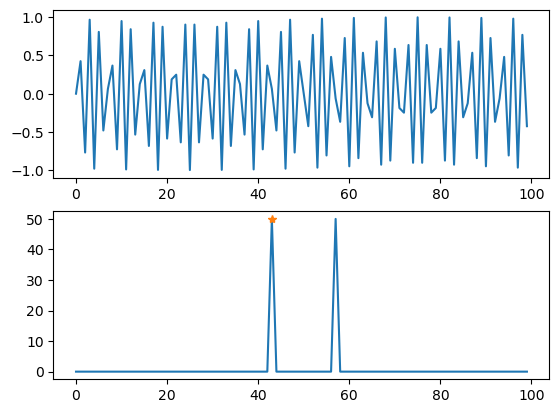

In [39]:
f=43
r = np.sin(2*np.pi*f*t)


Tsf_gcd = np.gcd(int(1/Ts),f)
P = int((1/Ts)/Tsf_gcd)
f_index = int(f/Tsf_gcd)
print('period:', P)
print('feq index:',f_index)

R=np.fft.fft(r[0:P])
fig,ax=plt.subplots(2,1)
ax[0].plot(r[0:P])
ax[1].plot(np.abs(R))
ax[1].plot(f_index,np.abs(R[f_index]),'*')


period: 100
feq index: 43


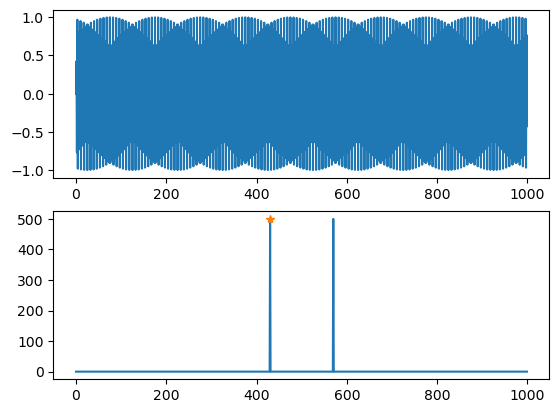

In [48]:
f=43
r = np.sin(2*np.pi*f*t)


Tsf_gcd = np.gcd(int(1/Ts),f)
P = int((1/Ts)/Tsf_gcd)
f_index = int(f/Tsf_gcd)
print('period:', P)
print('feq index:',f_index)

num_periods=int(np.floor(N/P))
R=np.fft.fft(r[0:P*num_periods])
fig,ax=plt.subplots(2,1)
ax[0].plot(r[0:P*num_periods])
ax[1].plot(np.abs(R))
ax[1].plot(f_index*num_periods,np.abs(R[f_index*num_periods]),'*')


In [19]:
f=30
print(1/Ts)
print(f)
Tgdc = np.gcd(int(1/Ts),f)
print('gcd:', Tgdc)
print('period:', int((1/Ts)/Tgdc))

100.0
30
gcd: 10
period: 10


0.01
4
250
500.0
500.0


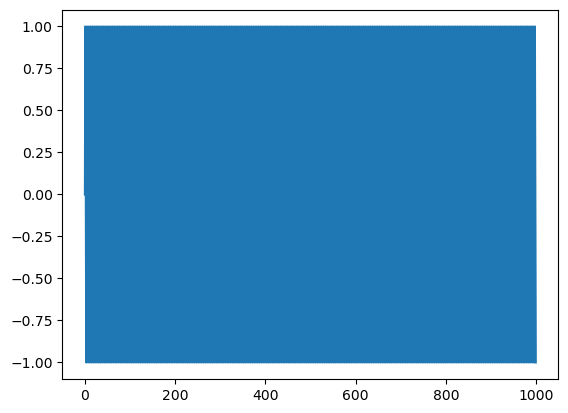

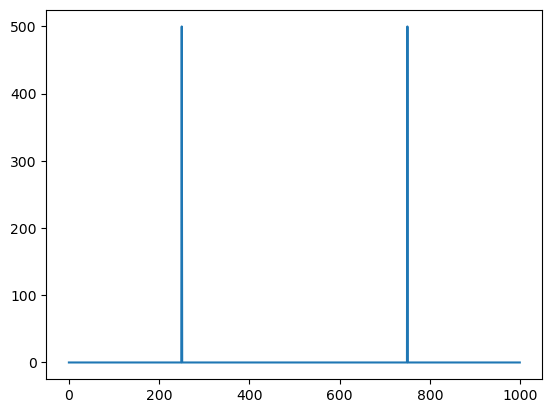

In [48]:
T=4
r = np.sin(2*np.pi/Ts/T*t)
        

num_periods = int( np.floor(N/T) )
       
R = np.fft.fft(r[0:num_periods*T])
       
        
print(Ts)
print(T)
print(num_periods)
print(np.abs(R[num_periods]))
print((num_periods*T)/2)
fig,ax=plt.subplots(1)
ax.plot(r[0:T*num_periods])
fig,ax=plt.subplots(1)
ax.plot(np.abs(R))

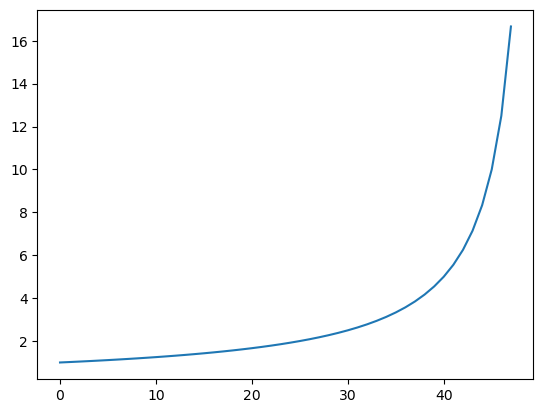

In [3]:
fig,ax=plt.subplots(1)
ax.plot(f_vec)

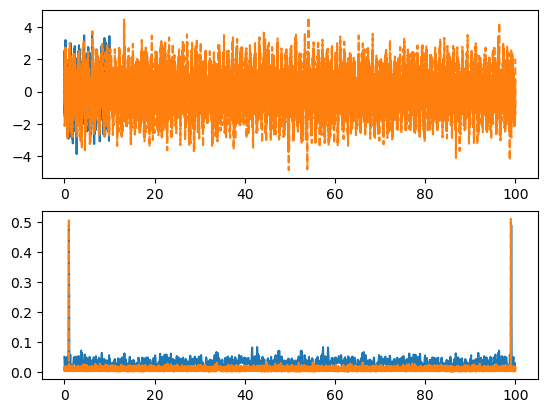

In [35]:
fig,ax=plt.subplots(2,1)
#N1 = 100
t1 = np.arange(0,10,step=0.01)
N1 = t1.shape[0]
f1 = np.linspace(0,100,N1)
s1 = np.sin(2*np.pi*t1)
x1 = np.random.randn(N1)
S1 = np.fft.fft(s1)/N1
X1 = np.fft.fft(x1)/N1
ax[0].plot(t1,s1+x1)
ax[1].plot(f1,np.abs(S1+X1))

#N2 = 200
t2 = np.arange(0,100,step=0.01)
N2 = t2.shape[0]
f2 = np.linspace(0,100,N2)
s2 = np.sin(2*np.pi*t2)
x2 = np.random.randn(N2) 
S2 = np.fft.fft(s2)/N2
X2 = np.fft.fft(x2)/N2
ax[0].plot(t2,s2+x2,'--')
ax[1].plot(f2,np.abs(S2+X2),'--')
        